# Introduction to Plotting with Matplotlib in Python


This tutorial demonstrates how to use Matplotlib, a powerful data visualization library in Python, to create line, bar, and scatter plots with stock market data.

In [4]:
import pandas as pd

djia_data = pd.read_csv('HistoricalPrices.csv')
djia_data.head()

,Date,Open,High,Low,Close
0,05/23/25,41525.70,41788.61,41354.09,41603.07
1,05/22/25,41763.68,42090.42,41714.43,41859.09
2,05/21/25,42354.46,42439.27,41785.22,41860.44
3,05/20/25,42735.11,42800.04,42485.37,42677.24
4,05/19/25,42542.81,42842.04,42337.71,42792.07


In [5]:
print(djia_data.columns)


Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')


In [6]:
djia_data = djia_data.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})

In [7]:
djia_data['Date'] = pd.to_datetime(djia_data['Date'])
djia_data = djia_data.sort_values(by = 'Date')

/tmp/ipykernel_7784/220103799.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_data['Date'] = pd.to_datetime(djia_data['Date'])


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# Line Plots with a Single Line

We can create a line plot in matplotlib using the plt.plot() method where the first argument is the x variable and the second argument is the y variable in our line plot. Whenever we create a plot, we need to make sure to call plt.show() to ensure we see the graph we have created.  We will visualize the close price over time of the DJIA. 

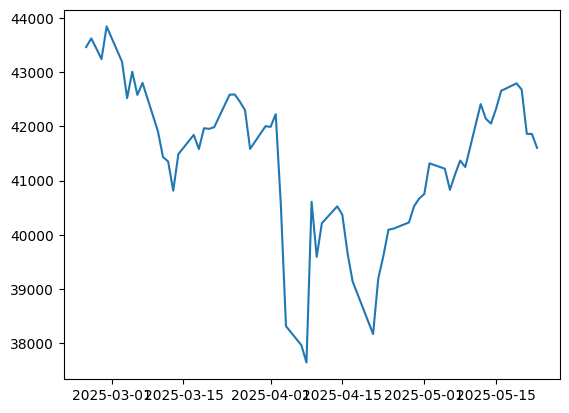

In [9]:
plt.plot(djia_data['Date'], djia_data['Close'])
plt.show()

## Line Plots with Multiple Lines

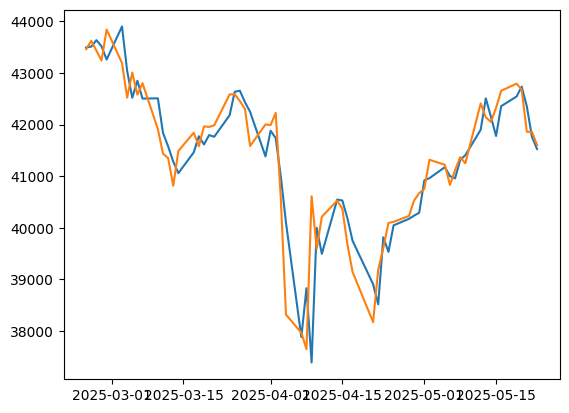

In [10]:
plt.plot(djia_data['Date'], djia_data['Open'])
plt.plot(djia_data['Date'], djia_data['Close'])

plt.show()

# Adding a Legend

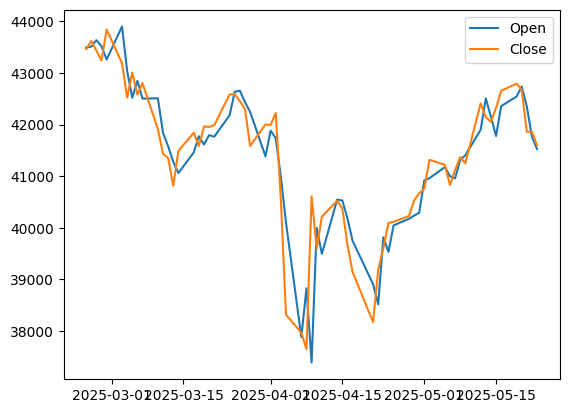

In [11]:
plt.plot(djia_data['Date'], djia_data['Open'], label = 'Open')
plt.plot(djia_data['Date'], djia_data['Close'], label = 'Close')
plt.legend()
plt.show()

# Drawing Bar Plots

In [12]:
# Import the calendar package 
from calendar import month_name

# Order by months by chronological order
djia_data['Month'] = pd.Categorical(djia_data['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
djia_monthly_mean = djia_data \
    .groupby('Month') \
    .mean() \
    .reset_index()

djia_monthly_mean.head(6)

/tmp/ipykernel_7784/3461523358.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Month') \


,Month,Date,Open,High,Low,Close
0,January,NaT,NaN,NaN,NaN,NaN
1,February,2025-02-26 00:00:00.000000000,43482.912000,43818.226000,43254.196000,43519.180000
2,March,2025-03-16 05:42:51.428571392,42143.297619,42403.295238,41760.600476,42092.129048
3,April,2025-04-15 04:34:17.142857216,39847.356667,40381.478571,39248.301429,39876.327619
4,May,2025-05-12 12:42:21.176470528,41725.798235,41988.477647,41547.528824,41777.706471
5,June,NaT,NaN,NaN,NaN,NaN


## Vertical Bar Plots

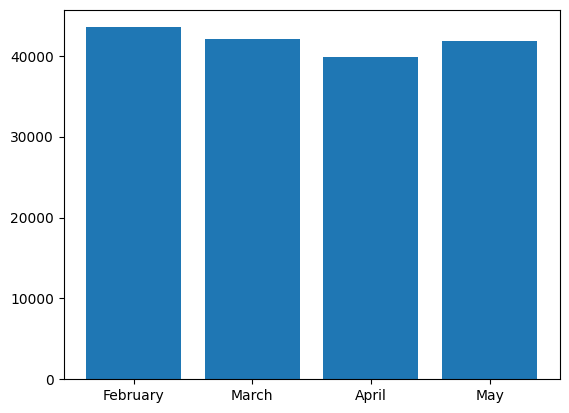

In [13]:
plt.bar(djia_monthly_mean['Month'], height = djia_monthly_mean['Close'])
plt.show()

# Reordering Bars in Bar Plots

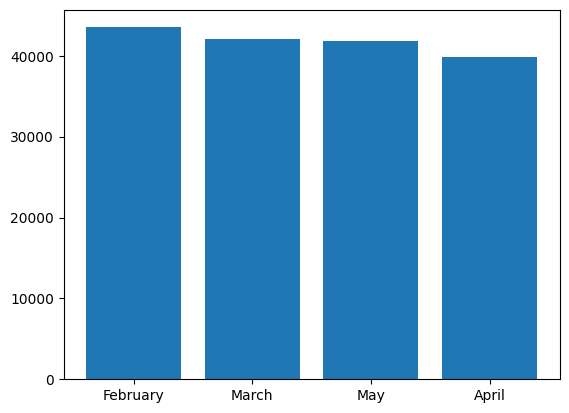

In [14]:
djia_monthly_mean_srtd = djia_monthly_mean.sort_values(by = 'Close', ascending = False)
plt.bar(djia_monthly_mean_srtd['Month'], height = djia_monthly_mean_srtd['Close'])
plt.show()

# Horizontal Bar Plots

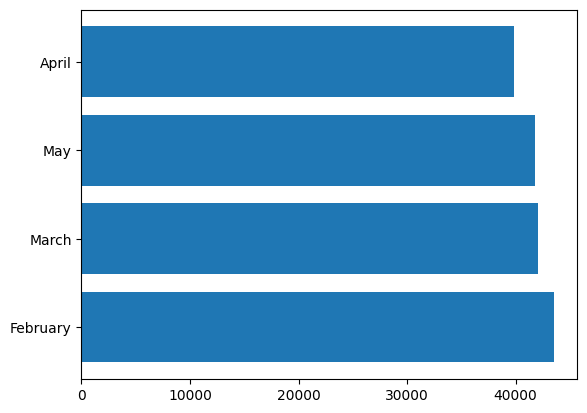

In [18]:
plt.barh(djia_monthly_mean_srtd['Month'], djia_monthly_mean_srtd['Close'])
plt.show()

### Drawing Scatter Plots


# Scatter Plots
Scatterplots are very useful for identifying relationships between 2 numeric variables. This can give you a sense of what to expect in a variable when the other variable changes and can also be very informative in your decision to use different modeling techniques such as linear or non-linear regression.  

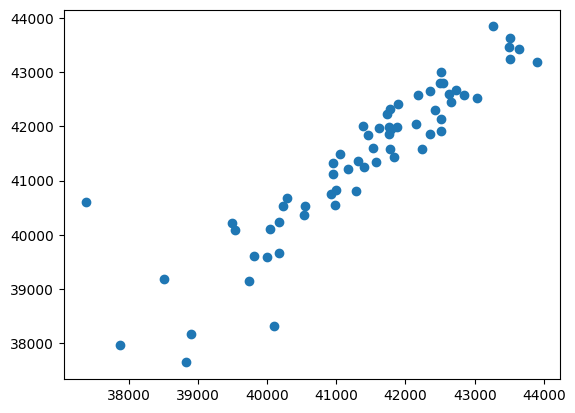

In [19]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.show()

# Scatter Plots with a Trend Line

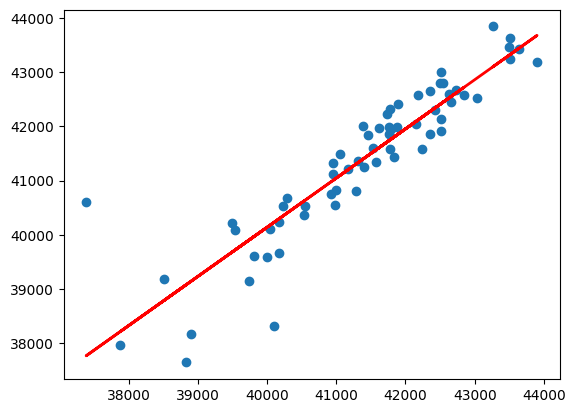

In [26]:
z = np.polyfit(djia_data['Open'], djia_data['Close'], 1)
p = np.poly1d(z)

plt.scatter(djia_data['Open'], djia_data['Close'], )
plt.plot(djia_data['Open'], p(djia_data['Open']), color='red', linewidth=2)
plt.show()

# Setting the Plot Title and Axis Labels

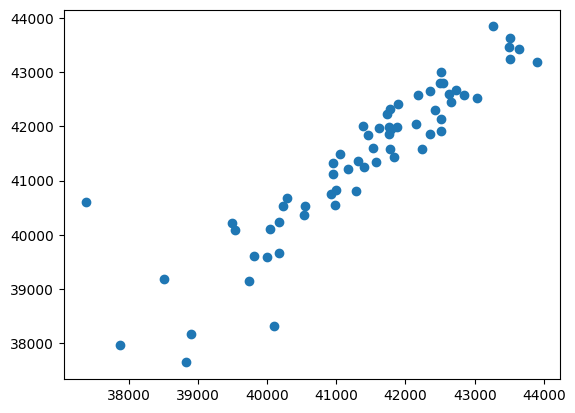

In [28]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.show()

# Changing Colors

Color can be a powerful tool in data visualizations for emphasizing certain points or telling a consistent story with consistent colors for a certain idea. In Matplotlib, we can change colors using named colors (e.g. "red", "blue", etc.), hex code ("#f4db9a", "#383c4a", etc.), and red-green-blue tuples (e.g. (125, 100, 37), (30, 54, 121), etc.). 

# Lines

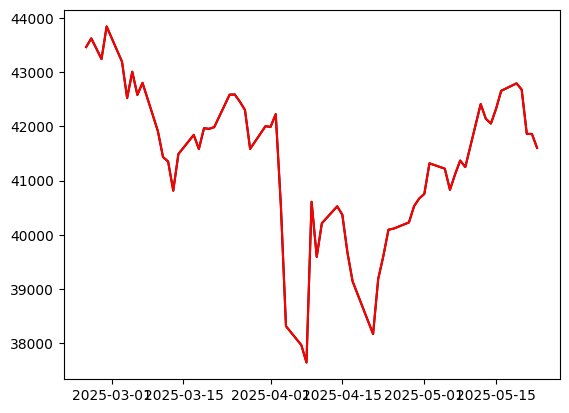

In [36]:
plt.plot(djia_data['Date'], djia_data['Close'], color='black')
plt.plot(djia_data['Date'], djia_data['Close'], color='red')
plt.show()

# Bars

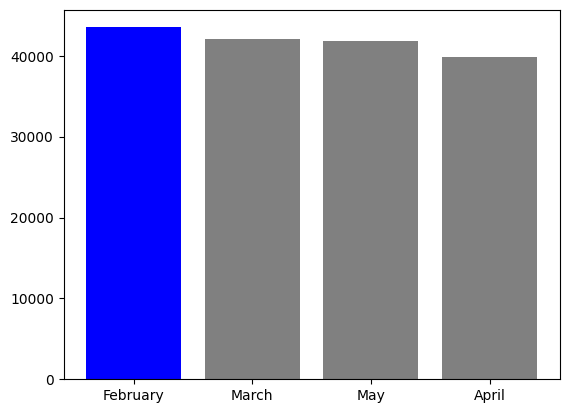

In [37]:
plt.bar(djia_monthly_mean_srtd['Month'], height = djia_monthly_mean_srtd['Close'], color = ['blue', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.show()

# Points 
Finally, for scatter plots, we can change the color using the color attribute of plt.scatter(). We will color all points in January as blue and all other points as gray to show a similar story as in the above visualization. 




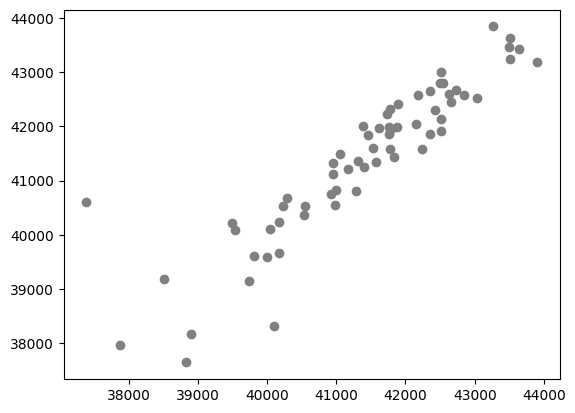

In [38]:
plt.scatter(djia_data[djia_data['Month'] == 'January']['Open'], djia_data[djia_data['Month'] == 'January']['Close'], color = 'blue')

plt.scatter(djia_data[djia_data['Month'] != 'January']['Open'], djia_data[djia_data['Month'] != 'January']['Close'], color = 'gray')

plt.show()

# Using Colormaps
Colormaps are built-in Matplotlib colors that scale based on the magnitude of the value (documentation here). The colormaps generally aesthetically look good together and help tell a story in the increasing values. 

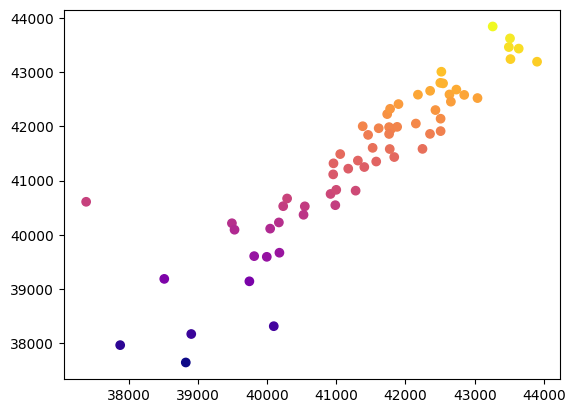

In [39]:
plt.scatter(djia_data['Open'], djia_data['Close'], c=djia_data['Close'], cmap = plt.cm.plasma)

plt.show()

# Saving Plots
we can save plots that we create in matplotlib using the plt.savefig() method. We can save the file in many different file formats including ‘png,’ ‘pdf,’ and ‘svg’. The first argument is the filename.

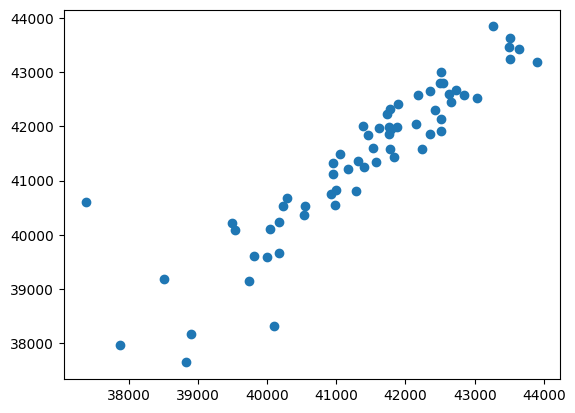

In [42]:
plt.scatter(djia_data['Open'], djia_data['Close'])
plt.savefig('scatter_plot_Open vs. Close.png')